In [ ]:
import pandas as pd

In [ ]:
stocks = pd.read_csv('https://raw.githubusercontent.com/lucas-mdsena/brazilian_stock_analysis/main/statusinvest-busca-avancada_19-06-23.csv', sep=';')
ibov = pd.read_csv('https://raw.githubusercontent.com/lucas-mdsena/brazilian_stock_analysis/main/IBOVDia_19-06-23.csv', sep=';')

In [ ]:
stocks.head()

,TICKER,PRECO,DY,P_L,P_VP,P_ATIVOS,MARGEM_BRUTA,MARGEM_EBIT,MARG_LIQUIDA,P_EBIT,...,PATRIMONIO_ATIVOS,PASSIVOS_ATIVOS,GIRO_ATIVOS,CAGR_RECEITAS_5_ANOS,CAGR_LUCROS_5_ANOS,LIQUIDEZ_MEDIA_DIARIA,VPA,LPA,PEG_Ratio,VALOR_DE_MERCADO
0,AALR3,"23,45",NaN,"-11,21","3,06","1,08","30,83","-1,55","-22,50","-163,00",...,"0,35","0,63","0,43","0,13",NaN,"5550661,94","7,67","-2,09","-0,02","2773966535,20"
1,ABCB4,"18,57","5,84","5,42","0,79","0,08","30,57","22,37","17,25","4,18",...,"0,10","0,91","0,08","18,70","12,65","19129165,94","23,40","3,43","0,22","4198493491,26"
2,ABEV3,"15,10","5,05","16,13","2,80","1,76","49,71","22,46","18,03","12,95",...,"0,63","0,36","0,60","10,72","15,19","345505024,68","5,40","0,94","1,69","237882882588,40"
3,ADHM3,"1,56",NaN,"-4,09","-1,29","105,12","100,00","-13548,48","-18860,61","-5,69",...,"-81,72","82,72","0,14",NaN,NaN,NaN,"-1,21","-0,38","-0,58","25439770,20"
4,AERI3,"1,50",NaN,"-9,89","1,33","0,35","13,11","9,22","-4,20","4,51",...,"0,26","0,74","0,84",NaN,NaN,"7466114,47","1,13","-0,15","0,03","1149320184,00"


In [ ]:
ibov.head()

,ticker,stock,type,qt,part
0,RRRP3,3R PETROLEUM,ON NM,234.689.601,"0,368"
1,ALSO3,ALIANSCSONAE,ON NM,532.365.440,"0,602"
2,ALPA4,ALPARGATAS,PN N1,202.765.994,"0,109"
3,ABEV3,AMBEV S/A,ON,4.386.652.506,"3,192"
4,ARZZ3,AREZZO CO,ON NM,60.758.326,"0,22"


# Data pre-processing

In [ ]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ticker  88 non-null     object
 1   stock   86 non-null     object
 2   type    86 non-null     object
 3   qt      88 non-null     object
 4   part    87 non-null     object
dtypes: object(5)
memory usage: 3.6+ KB


There's a few missing values in this dataset and numerical values types are object, but only the column ticker will be used.<br>
There is no need for treatment.

In [ ]:
ibov.ticker.nunique()

88

In [ ]:
ibov = ibov.drop(columns=['stock', 'type', 'qt', 'part'],
                 axis=1)

In [ ]:
# Selecting only the stocks within Ibovespa index
stocks_ibov = pd.merge(left=ibov,
                       right=stocks,
                       left_on=['ticker'],
                       right_on=['TICKER'])\
                .drop(columns='ticker', axis=1)
stocks_ibov.head()

,TICKER,PRECO,DY,P_L,P_VP,P_ATIVOS,MARGEM_BRUTA,MARGEM_EBIT,MARG_LIQUIDA,P_EBIT,...,PATRIMONIO_ATIVOS,PASSIVOS_ATIVOS,GIRO_ATIVOS,CAGR_RECEITAS_5_ANOS,CAGR_LUCROS_5_ANOS,LIQUIDEZ_MEDIA_DIARIA,VPA,LPA,PEG_Ratio,VALOR_DE_MERCADO
0,RRRP3,"32,76",NaN,"17,30","1,83","0,98","45,02","10,71","23,66","38,22",...,"0,54","0,45","0,24","118,19",NaN,"220398933,38","17,89","1,89","-0,06","7859040363,72"
1,ALSO3,"23,46","2,21","4,38","0,91","0,47","111,74","384,80","209,84","2,39",...,"0,51","0,45","0,05","25,65","85,92","118623015,88","25,74","5,36","0,00","13464559885,14"
2,ALPA4,"10,91",NaN,"-67,13","1,35","0,92","45,10","-3,22","-2,67","-55,68",...,"0,68","0,32","0,51","2,36",NaN,"87511746,18","8,07","-0,16","0,57","7632149507,19"
3,ABEV3,"15,10","5,05","16,13","2,80","1,76","49,71","22,46","18,03","12,95",...,"0,63","0,36","0,60","10,72","15,19","345505024,68","5,40","0,94","1,69","237882882588,40"
4,ARZZ3,"75,14","1,84","21,40","3,07","1,63","53,67","11,17","8,82","16,89",...,"0,53","0,47","0,86","25,49","20,34","119118802,94","24,48","3,51","-1,77","8339728938,84"


In [ ]:
stocks_ibov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TICKER                  86 non-null     object
 1   PRECO                   86 non-null     object
 2   DY                      67 non-null     object
 3   P_L                     86 non-null     object
 4   P_VP                    86 non-null     object
 5   P_ATIVOS                86 non-null     object
 6   MARGEM_BRUTA            84 non-null     object
 7   MARGEM_EBIT             84 non-null     object
 8   MARG_LIQUIDA            84 non-null     object
 9   P_EBIT                  86 non-null     object
 10  EV_EBIT                 86 non-null     object
 11  DIVIDA_LIQUIDA_EBIT     78 non-null     object
 12  DIV_LIQ_PATRI           76 non-null     object
 13  PSR                     84 non-null     object
 14  P_CAP_GIRO              84 non-null     object
 15  P_AT_CIR

The resulting dataset has some missing values, also a data type treatment is required, since numerical values are identified as object type.

## Missing values

In [ ]:
stocks_ibov.isna().sum()

TICKER                     0
PRECO                      0
DY                        19
P_L                        0
P_VP                       0
P_ATIVOS                   0
MARGEM_BRUTA               2
MARGEM_EBIT                2
MARG_LIQUIDA               2
P_EBIT                     0
EV_EBIT                    0
DIVIDA_LIQUIDA_EBIT        8
DIV_LIQ_PATRI             10
PSR                        2
P_CAP_GIRO                 2
P_AT_CIR_LIQ               0
LIQ_CORRENTE               2
ROE                        0
ROA                        0
ROIC                       8
PATRIMONIO_ATIVOS          0
PASSIVOS_ATIVOS            0
GIRO_ATIVOS                0
CAGR_RECEITAS_5_ANOS       5
CAGR_LUCROS_5_ANOS        32
 LIQUIDEZ_MEDIA_DIARIA     0
 VPA                       0
 LPA                       0
 PEG_Ratio                 0
 VALOR_DE_MERCADO          0
dtype: int64

DY - Dividend Yield has 19 missing values. They represent stocks with no dividend paid to acionists, so they might be replaced by zero. <br>
CAGR_LUCROS_5_ANOS and DIV_LIQ_PATRI has to many missing values, so drop the columns might be a better strategy.<br>
The remaing missing values will be droped.

In [ ]:
stocks_ibov[stocks_ibov.DY.isna()]

,TICKER,PRECO,DY,P_L,P_VP,P_ATIVOS,MARGEM_BRUTA,MARGEM_EBIT,MARG_LIQUIDA,P_EBIT,...,PATRIMONIO_ATIVOS,PASSIVOS_ATIVOS,GIRO_ATIVOS,CAGR_RECEITAS_5_ANOS,CAGR_LUCROS_5_ANOS,LIQUIDEZ_MEDIA_DIARIA,VPA,LPA,PEG_Ratio,VALOR_DE_MERCADO
0,RRRP3,"32,76",NaN,"17,30","1,83","0,98","45,02","10,71","23,66","38,22",...,"0,54","0,45","0,24","118,19",NaN,"220398933,38","17,89","1,89","-0,06","7859040363,72"
2,ALPA4,"10,91",NaN,"-67,13","1,35","0,92","45,10","-3,22","-2,67","-55,68",...,"0,68","0,32","0,51","2,36",NaN,"87511746,18","8,07","-0,16","0,57","7632149507,19"
6,AZUL4,"21,54",NaN,"-6,60","-1,38","1,57","18,55","10,14","-23,94","15,59",...,"-1,13","2,13","0,99","15,41",NaN,"257737870,44","-15,60","-3,26","0,02","7496126972,98"
13,BRKM5,"31,06",NaN,"-6,14","3,16","0,27","8,08","1,12","-4,52","24,81",...,"0,09","0,92","0,99","14,40",NaN,"153959197,41","9,82","-5,06","0,05","24716108458,84"
14,BRFS3,"9,21",NaN,"-3,79","0,97","0,17","15,82","0,38","-4,78","47,15",...,"0,18","0,81","0,95","13,70",NaN,"166603873,47","9,49","-2,43","-0,03","9969578595,66"
20,COGN3,"3,34",NaN,"-13,58","0,51","0,24","63,38","7,69","-8,80","15,54",...,"0,47","0,49","0,20","-1,73",NaN,"91074400,53","6,51","-0,25","-1,11","6267864741,40"
25,CVCB3,"4,29",NaN,"-3,01","6,25","0,32","100,00","-4,74","-32,23","-20,50",...,"0,05","0,95","0,33","0,61",NaN,"99302583,76","0,69","-1,42","0,10","1189390955,61"
30,EMBR3,"20,21",NaN,"-13,00","1,17","0,28","19,41","-2,56","-4,78","-24,28",...,"0,24","0,73","0,45","4,54",NaN,"183858529,44","17,29","-1,55","0,00","14964798539,24"
33,ENEV3,"12,11",NaN,"46,36","1,52","0,46","32,90","21,56","5,29","11,37",...,"0,30","0,67","0,19","17,63","34,08","116076493,85","7,95","0,26","-0,72","19189171497,58"
40,GOLL4,"11,70",NaN,"-10,55","-1,78","2,20","23,37","7,55","-21,01","29,34",...,"-1,24","2,24","0,99","8,03",NaN,"129216318,24","-6,57","-1,11","-0,15","4898241000,90"


In [ ]:
stocks_ibov.DY = stocks_ibov.DY.fillna(0)
stocks_ibov = stocks_ibov.drop(columns=['DIV_LIQ_PATRI','CAGR_LUCROS_5_ANOS'], axis=1)
stocks_ibov = stocks_ibov.dropna()
stocks_ibov.isna().sum()

TICKER                    0
PRECO                     0
DY                        0
P_L                       0
P_VP                      0
P_ATIVOS                  0
MARGEM_BRUTA              0
MARGEM_EBIT               0
MARG_LIQUIDA              0
P_EBIT                    0
EV_EBIT                   0
DIVIDA_LIQUIDA_EBIT       0
PSR                       0
P_CAP_GIRO                0
P_AT_CIR_LIQ              0
LIQ_CORRENTE              0
ROE                       0
ROA                       0
ROIC                      0
PATRIMONIO_ATIVOS         0
PASSIVOS_ATIVOS           0
GIRO_ATIVOS               0
CAGR_RECEITAS_5_ANOS      0
 LIQUIDEZ_MEDIA_DIARIA    0
 VPA                      0
 LPA                      0
 PEG_Ratio                0
 VALOR_DE_MERCADO         0
dtype: int64

In [ ]:
stocks_ibov

,TICKER,PRECO,DY,P_L,P_VP,P_ATIVOS,MARGEM_BRUTA,MARGEM_EBIT,MARG_LIQUIDA,P_EBIT,...,ROIC,PATRIMONIO_ATIVOS,PASSIVOS_ATIVOS,GIRO_ATIVOS,CAGR_RECEITAS_5_ANOS,LIQUIDEZ_MEDIA_DIARIA,VPA,LPA,PEG_Ratio,VALOR_DE_MERCADO
0,RRRP3,"32,76",0,"17,30","1,83","0,98","45,02","10,71","23,66","38,22",...,"-2,55","0,54","0,45","0,24","118,19","220398933,38","17,89","1,89","-0,06","7859040363,72"
1,ALSO3,"23,46","2,21","4,38","0,91","0,47","111,74","384,80","209,84","2,39",...,"25,62","0,51","0,45","0,05","25,65","118623015,88","25,74","5,36","0,00","13464559885,14"
2,ALPA4,"10,91",0,"-67,13","1,35","0,92","45,10","-3,22","-2,67","-55,68",...,"-2,56","0,68","0,32","0,51","2,36","87511746,18","8,07","-0,16","0,57","7632149507,19"
3,ABEV3,"15,10","5,05","16,13","2,80","1,76","49,71","22,46","18,03","12,95",...,"19,66","0,63","0,36","0,60","10,72","345505024,68","5,40","0,94","1,69","237882882588,40"
4,ARZZ3,"75,14","1,84","21,40","3,07","1,63","53,67","11,17","8,82","16,89",...,"12,76","0,53","0,47","0,86","25,49","119118802,94","24,48","3,51","-1,77","8339728938,84"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,VALE3,"69,52","8,19","3,83","1,66","0,71","41,14","32,52","38,57","4,54",...,"23,96","0,43","0,56","0,48","15,85","2174204288,41","41,79","18,15","-0,14","315551806961,60"
82,VIIA3,"2,57",0,"-6,25","0,81","0,12","31,36","3,40","-2,13","3,92",...,"0,78","0,15","0,85","0,90","3,76","139568779,24","3,17","-0,41","-0,14","4107968412,73"
83,VBBR3,"17,89","4,13","16,12","1,64","0,52","3,64","1,87","0,71","6,14",...,"10,53","0,32","0,68","4,53","16,50","240532924,21","10,90","1,11","-0,36","20841850000,00"
84,WEGE3,"37,70","1,47","34,62","10,64","5,47","30,38","17,84","14,85","28,82",...,"24,36","0,51","0,47","1,06","25,71","260439306,88","3,54","1,09","1,62","158238888524,60"


## Data type transform

In [ ]:
tickers = stocks_ibov.TICKER
stocks_ibov = stocks_ibov.iloc[:, 1:].replace(',', '.', regex=True).astype('float')

# EDA

In [ ]:
stocks_ibov.describe().round()

,PRECO,DY,P_L,P_VP,P_ATIVOS,MARGEM_BRUTA,MARGEM_EBIT,MARG_LIQUIDA,P_EBIT,EV_EBIT,...,ROIC,PATRIMONIO_ATIVOS,PASSIVOS_ATIVOS,GIRO_ATIVOS,CAGR_RECEITAS_5_ANOS,LIQUIDEZ_MEDIA_DIARIA,VPA,LPA,PEG_Ratio,VALOR_DE_MERCADO
count,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,...,74.0,74.0,74.0,74.0,74.0,7.400000e+01,74.0,74.0,74.0,7.400000e+01
mean,23.0,5.0,18.0,2.0,1.0,39.0,26.0,13.0,-6.0,-7.0,...,10.0,0.0,1.0,1.0,19.0,2.259491e+08,14.0,2.0,-0.0,4.380384e+10
std,16.0,8.0,58.0,2.0,1.0,24.0,50.0,33.0,128.0,158.0,...,11.0,0.0,0.0,1.0,19.0,3.270610e+08,12.0,4.0,1.0,8.079774e+10
min,3.0,0.0,-140.0,-2.0,0.0,-41.0,-41.0,-32.0,-1082.0,-1330.0,...,-21.0,-1.0,0.0,0.0,-17.0,2.049777e+07,-16.0,-7.0,-4.0,7.700106e+08
25%,11.0,0.0,2.0,1.0,0.0,24.0,6.0,1.0,3.0,6.0,...,4.0,0.0,0.0,0.0,9.0,8.840241e+07,7.0,0.0,-0.0,7.975064e+09
50%,19.0,2.0,10.0,2.0,1.0,34.0,17.0,7.0,6.0,10.0,...,9.0,0.0,1.0,0.0,16.0,1.297358e+08,10.0,1.0,-0.0,1.958124e+10
75%,32.0,5.0,20.0,2.0,1.0,52.0,28.0,16.0,15.0,16.0,...,14.0,0.0,1.0,1.0,24.0,2.331009e+08,19.0,3.0,0.0,3.659819e+10
max,75.0,49.0,404.0,13.0,5.0,112.0,385.0,210.0,87.0,121.0,...,51.0,1.0,2.0,5.0,118.0,2.174204e+09,48.0,18.0,6.0,4.247228e+11


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Accent')
sns.set_style('darkgrid')

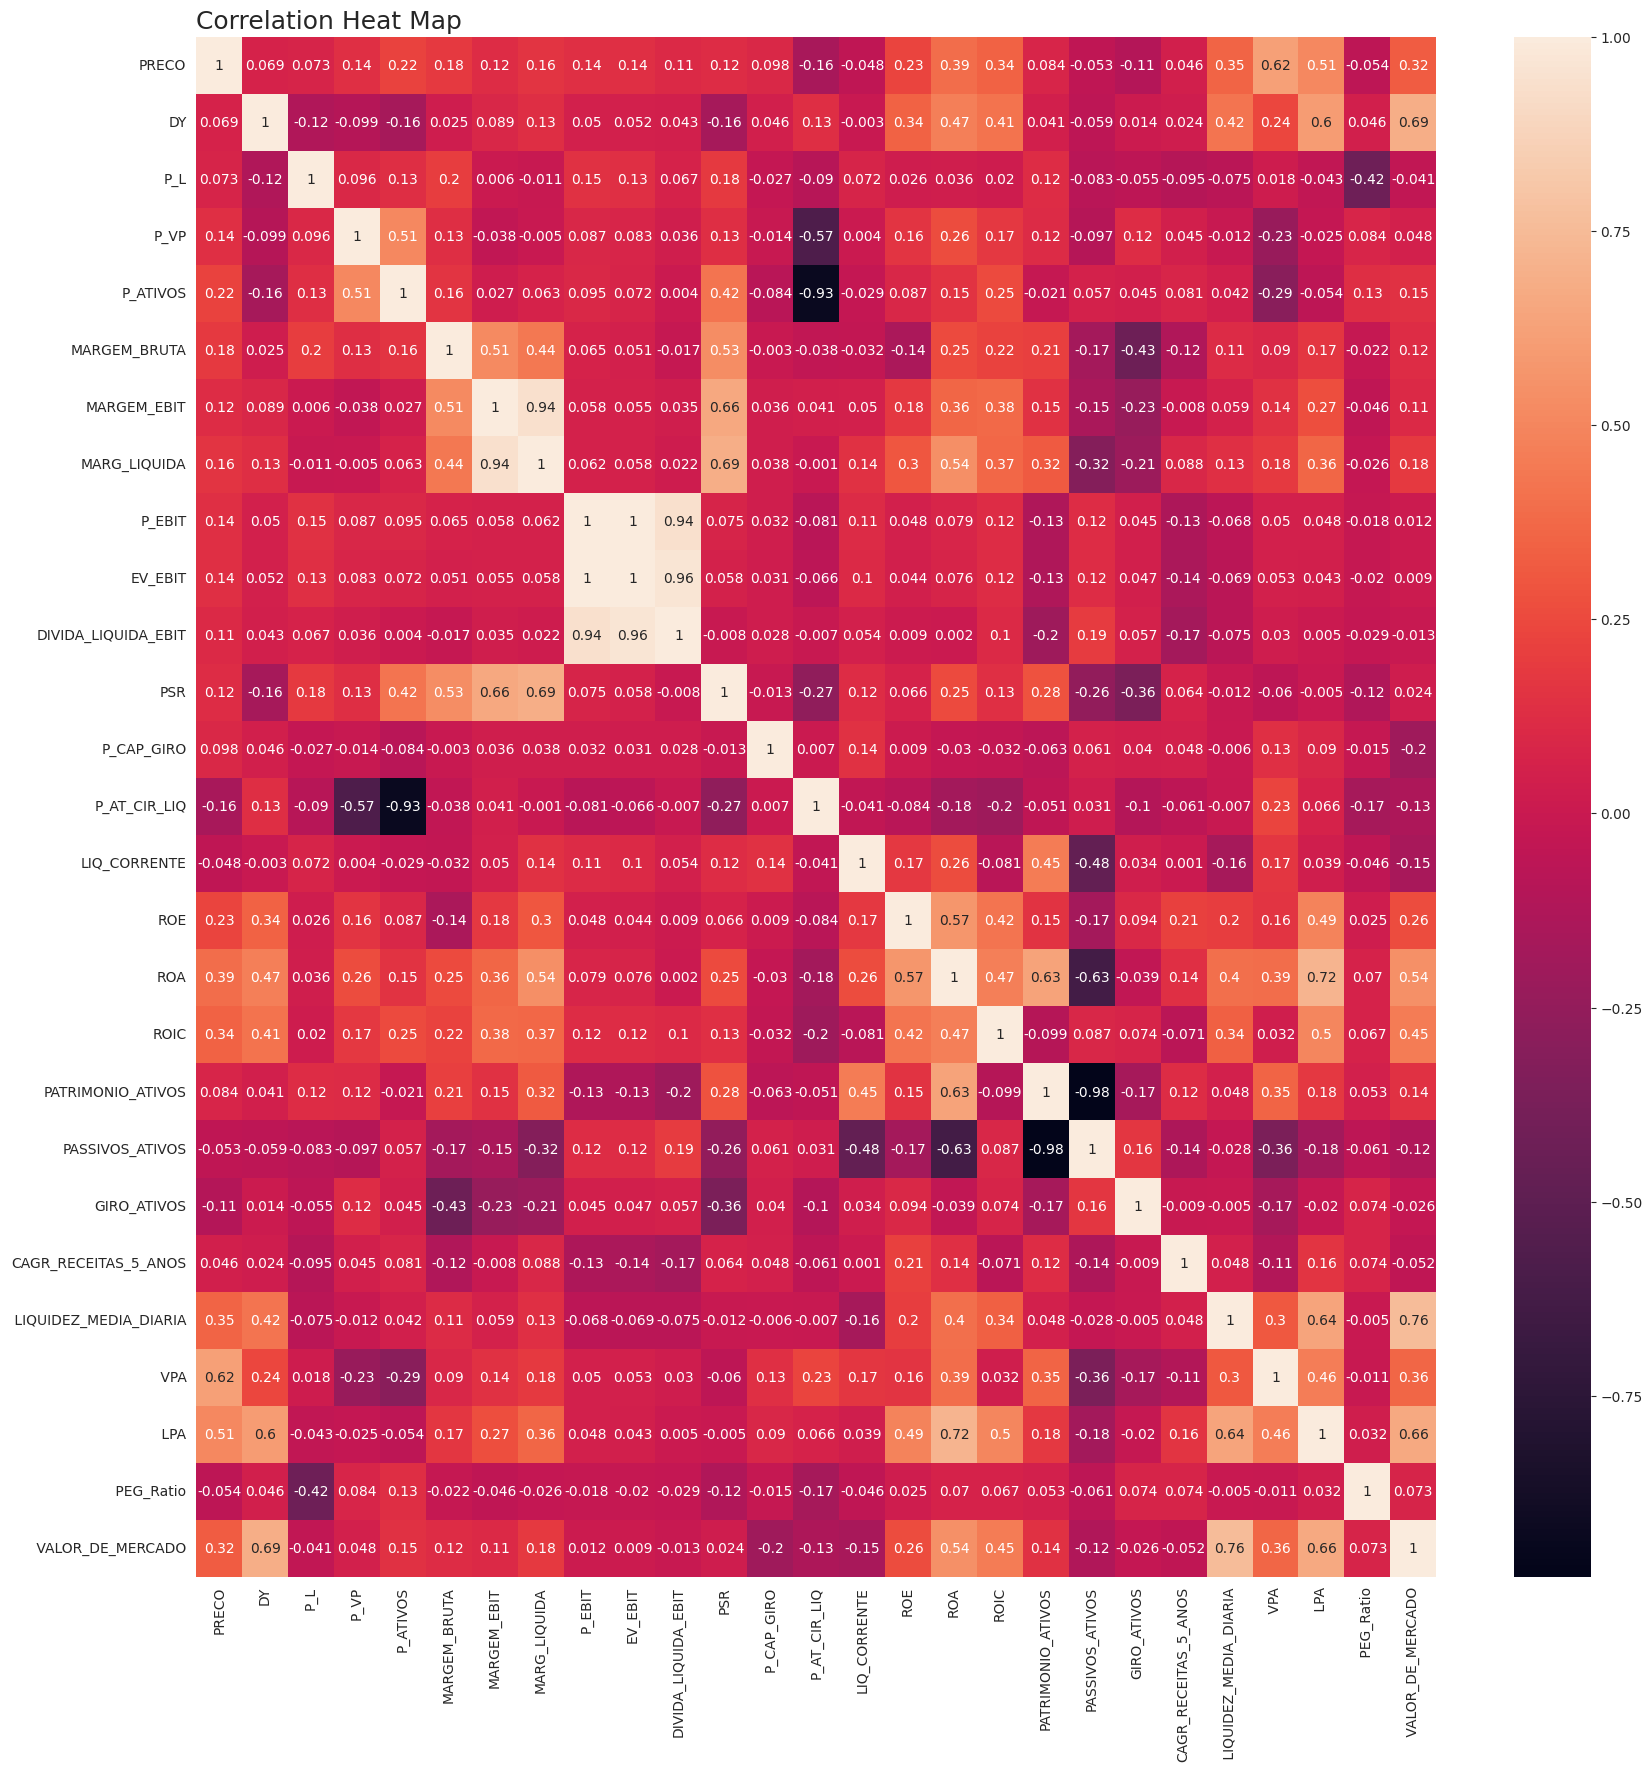

In [ ]:
corr_matrix = stocks_ibov.corr().round(3)
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr_matrix, annot=True)
ax.set_title('Correlation Heat Map', fontsize=18, loc='left')
ax = ax

# Clustering

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np

seed=10
np.random.seed(seed)

norm_values = Normalizer().fit_transform(stocks_ibov.values)
kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300)
labels=kmeans.fit_predict(norm_values) # returns the clusters
metrics.silhouette_score(norm_values, labels, metric='euclidean')

0.5695616599364339

In [ ]:
def clustering(n_clusters, values):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  labels=kmeans.fit_predict(values)
  silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
  davies_bouldin = metrics.davies_bouldin_score(values, labels)
  calinski = metrics.calinski_harabasz_score(values, labels)
  validation = print('Silhouette: ',round(silhouette, 4),'\n',
                     'Davies-Bouldin: ',round(davies_bouldin, 4),'\n',
                     'Calinski-Harabasz: ',round(calinski, 4)
                     )
  return validation

## Validation

In [ ]:
clustering(4, norm_values)
print('\n')
clustering(6, norm_values)
print('\n')
clustering(8, norm_values)

Silhouette:  0.6339 
 Davies-Bouldin:  0.3372 
 Calinski-Harabasz:  406.2685


Silhouette:  0.5696 
 Davies-Bouldin:  0.3847 
 Calinski-Harabasz:  608.9967


Silhouette:  0.5716 
 Davies-Bouldin:  0.3991 
 Calinski-Harabasz:  914.2627


## Checking the cluster stability

In [ ]:
a,b,c = np.array_split(values, 3)
clustering(6, a)
print('\n')
clustering(6, b)
print('\n')
clustering(6, c)

Silhouette:  0.6221 
 Davies-Bouldin:  0.3584 
 Calinski-Harabasz:  607.1182


Silhouette:  0.6038 
 Davies-Bouldin:  0.3834 
 Calinski-Harabasz:  150.9096


Silhouette:  0.5405 
 Davies-Bouldin:  0.3417 
 Calinski-Harabasz:  226.2229


The model with 6 clusters does'nt stands out the others, but it has a better balance between the indicators analyzed.

In [ ]:
random_data = np.random.rand(74,27)
print('Random data cluster')
clustering(6, random_data) # Random cluster with the same size for comparation
print('\n')
print('Stocks cluster')
clustering(6, stocks_ibov)

Random data cluster
Silhouette:  0.035 
 Davies-Bouldin:  2.9064 
 Calinski-Harabasz:  3.2565


Stocks cluster
Silhouette:  0.6236 
 Davies-Bouldin:  0.3746 
 Calinski-Harabasz:  984.7512


Comparing the model with another using random data, the random one shows a much lower result.

# Analyzing the clusters

- Fazer um PCA
- Escolher melhores variáveis com a técnica de variância dos centróides

In [ ]:
stocks_ibov['CLUSTER'] = labels
stocks_ibov['TICKER'] = tickers